# 대응분석 - 예시

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import svd

In [2]:
# 데이터 생성
data = np.array([[20, 10, 15],
                 [10, 30, 25],
                 [5, 10, 20]])

In [4]:
# 데이터프레임 생성
df = pd.DataFrame(data, index=['Row1', 'Row2', 'Row3'], columns=['Col1', 'Col2', 'Col3'])

# 행 합과 열 합 계산
row_sums = df.sum(axis=1).values
col_sums = df.sum(axis=0).values
total_sum = df.sum().sum()

# 행 프로파일과 열 프로파일 계산
row_profile = df.div(row_sums, axis=0)
col_profile = df.div(col_sums, axis=1)

In [6]:
# 기대 빈도 계산
expected = np.outer(row_sums, col_sums) / total_sum

# 카이제곱 거리 계산
chi2 = (df - expected) ** 2 / expected
chi2 = chi2.sum().sum()

# 표준화 잔차 계산
std_residuals = (df - expected) / np.sqrt(expected)

# 특이값 분해
U, S, Vt = svd(std_residuals)

# 2차원 좌표 계산
row_coordinates = U[:, :2] @ np.diag(S[:2])
col_coordinates = Vt.T[:, :2]

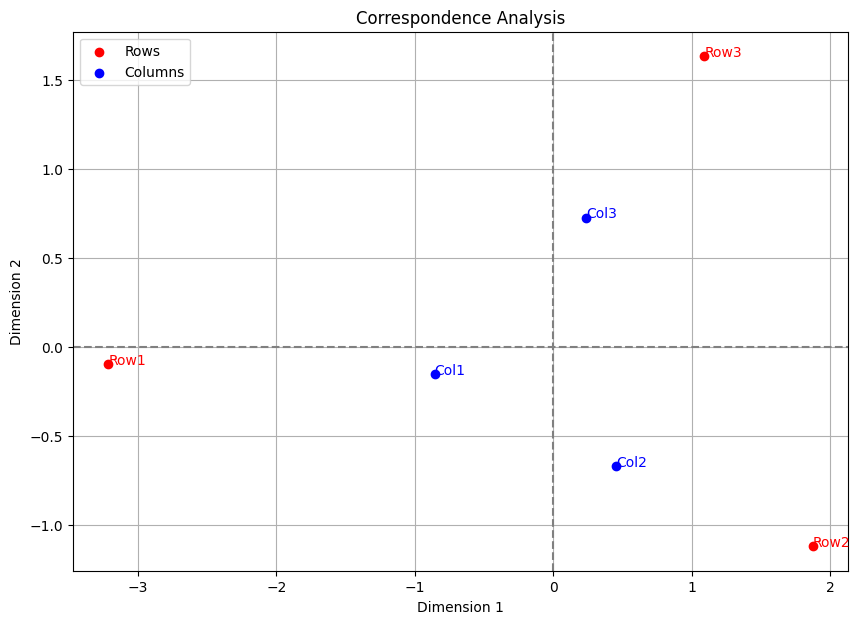

In [7]:
# 시각화
plt.figure(figsize=(10, 7))

# 행 좌표 시각화
plt.scatter(row_coordinates[:, 0], row_coordinates[:, 1], color='red', label='Rows')
for i, txt in enumerate(df.index):
    plt.annotate(txt, (row_coordinates[i, 0], row_coordinates[i, 1]), color='red')

# 열 좌표 시각화
plt.scatter(col_coordinates[:, 0], col_coordinates[:, 1], color='blue', label='Columns')
for i, txt in enumerate(df.columns):
    plt.annotate(txt, (col_coordinates[i, 0], col_coordinates[i, 1]), color='blue')

plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.title('Correspondence Analysis')
plt.grid()
plt.show()

# 대응분석 - 예시 (2)

In [8]:
# 데이터 생성
data = np.array([12, 34, 67, 10, 30, 10, 10, 10, 20, 40, 70, 15]).reshape(3, 4)

# 데이터프레임 생성
df = pd.DataFrame(data, index=['Row1', 'Row2', 'Row3'], columns=['Col1', 'Col2', 'Col3', 'Col4'])
df

,Col1,Col2,Col3,Col4
Row1,12,34,67,10
Row2,30,10,10,10
Row3,20,40,70,15


In [10]:
# 행 합과 열 합 계산
row_sums = df.sum(axis=1).values
col_sums = df.sum(axis=0).values
total_sum = df.sum().sum()
print(total_sum)

328


In [11]:
# 행 프로파일과 열 프로파일 계산
row_profile = df.div(row_sums, axis=0)
col_profile = df.div(col_sums, axis=1)
print(row_profile)
print(col_profile)

          Col1      Col2      Col3      Col4
Row1  0.097561  0.276423  0.544715  0.081301
Row2  0.500000  0.166667  0.166667  0.166667
Row3  0.137931  0.275862  0.482759  0.103448
          Col1      Col2      Col3      Col4
Row1  0.193548  0.404762  0.455782  0.285714
Row2  0.483871  0.119048  0.068027  0.285714
Row3  0.322581  0.476190  0.476190  0.428571


In [16]:
# 기대 빈도 계산
expected = np.outer(row_sums, col_sums) / total_sum
pd.DataFrame(expected)

,0,1,2,3
0,23.250000,31.500000,55.125000,13.125000
1,11.341463,15.365854,26.890244,6.402439
2,27.408537,37.134146,64.984756,15.472561


In [13]:
# 카이제곱 거리 계산
chi2 = (df - expected) ** 2 / expected
chi2 = chi2.sum().sum()
print(chi2)

56.76995099114914


In [14]:
# 표준화 잔차 계산
std_residuals = (df - expected) / np.sqrt(expected)
std_residuals

,Col1,Col2,Col3,Col4
Row1,-2.333141,0.445435,1.599408,-0.862582
Row2,5.540424,-1.368865,-3.257156,1.421790
Row3,-1.415108,0.470292,0.622137,-0.120137


In [17]:
# 특이값 분해
U, S, Vt = svd(std_residuals)

# 2차원 좌표 계산
row_coordinates = U[:, :2] @ np.diag(S[:2])
col_coordinates = Vt.T[:, :2]

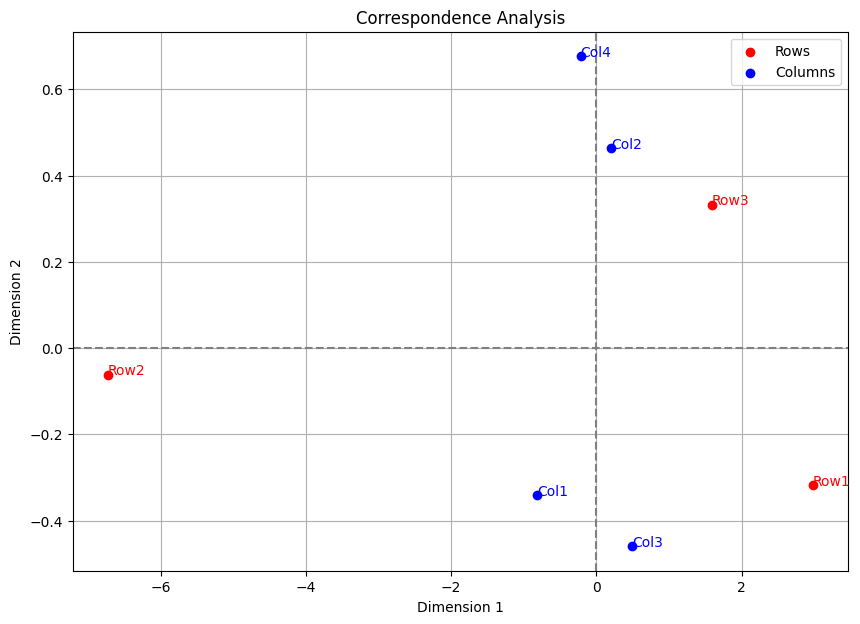

In [18]:
# 시각화
plt.figure(figsize=(10, 7))

# 행 좌표 시각화
plt.scatter(row_coordinates[:, 0], row_coordinates[:, 1], color='red', label='Rows')
for i, txt in enumerate(df.index):
    plt.annotate(txt, (row_coordinates[i, 0], row_coordinates[i, 1]), color='red')

# 열 좌표 시각화
plt.scatter(col_coordinates[:, 0], col_coordinates[:, 1], color='blue', label='Columns')
for i, txt in enumerate(df.columns):
    plt.annotate(txt, (col_coordinates[i, 0], col_coordinates[i, 1]), color='blue')

plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.title('Correspondence Analysis')
plt.grid()
plt.show()